<a href="https://colab.research.google.com/github/Amateratzu/Biophysic-Homework/blob/main/QLS_BiophysicsHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biophysics assignment
# Group members: Almene and Samuel

In [ ]:
###################### Import useful libraries #########################
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import simps
from matplotlib import patches as patches
from scipy.constants.constants import Boltzmann
from sklearn.feature_selection import mutual_info_regression

<ipython-input-5-ec35ebef9ed4>:5: DeprecationWarning: Please use `Boltzmann` from the `scipy.constants` namespace, the `scipy.constants.constants` namespace is deprecated.
  from scipy.constants.constants import Boltzmann


# Question 2

In [ ]:
###################################### Exercise 2, question b-Mutual information #################################
K=1
# Generate some sample data for position X and potential energy V
X = np.random.rand(1000, 1)  # Sample position data
V = (K * X**2)/2  # Calculate the potential energy based on the given formula

# Compute the mutual information
mi = mutual_info_regression(X, V.ravel())[0]
print("Mutual Information:", mi)

Mutual Information: 5.114512288679351


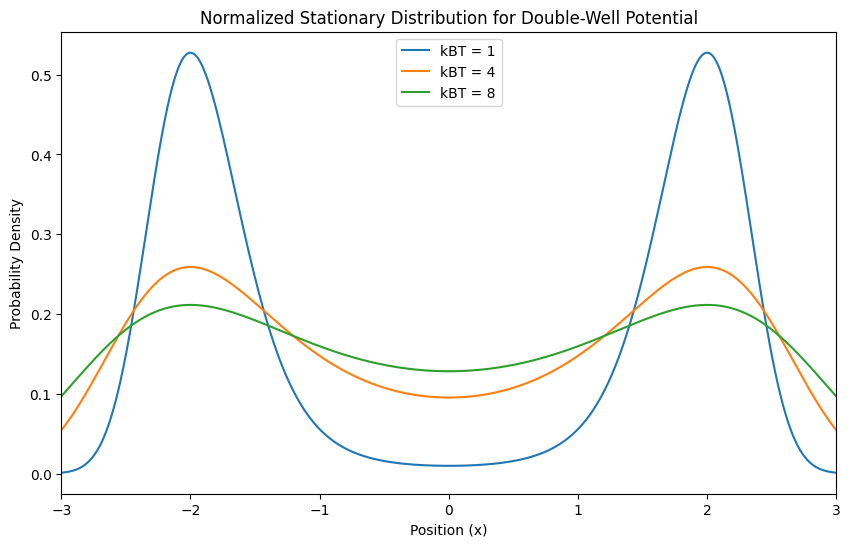

In [ ]:
########################################## Exercise 2, question c ##########################################################

# Function to compute the stationary distribution and partition function
def stationary_distribution(x, a, b, kBT):
    partition_function = np.trapz(np.exp((a / (2 * kBT)) * x**2 - (b / (4 * kBT)) * x**4), x)
    pdf_values = np.exp((a / (2 * kBT)) * x**2 - (b / (4 * kBT)) * x**4) / partition_function
    return pdf_values

# Parameters
a = 4
b = 1

# Values of x
x_values = np.linspace(-3, 3, 1000)

# Different temperatures
temperatures = [1, 4, 8]

# Plotting
plt.figure(figsize=(10, 6))
for kBT in temperatures:
    pdf_values = stationary_distribution(x_values, a, b, kBT)
    plt.plot(x_values, pdf_values, label=f'kBT = {kBT}')

plt.title('Normalized Stationary Distribution for Double-Well Potential')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.xlim([-3,3])
plt.legend()
plt.show()

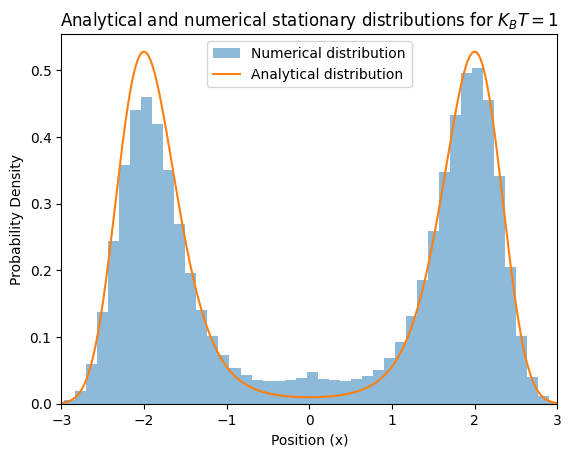

In [ ]:
############################################ Exercise 2, question d ##############################################################

################## Parameters ##########
a=4
b=1
D=1
Delta_t = 0.01
gamma=1
k=1.1
num_trajectories = 1000
num_steps=1000
x_values = np.linspace(-3, 3, 1000)

################ Useful functions #####################
######## Noise ######
def Epsilon():
    return np.random.normal(0,1)

####### Derivative of the potential #####
def dv(x):
  return -(a*x)+(b*(x**3))

# Function to compute the stationary distribution and partition function
def stationary_distribution(x, a, b, kBT):
    partition_function = np.trapz(np.exp((a / (2 * kBT)) * x**2 - (b / (4 * kBT)) * x**4), x)
    pdf_values = np.exp((a / (2 * kBT)) * x**2 - (b / (4 * kBT)) * x**4) / partition_function
    return pdf_values

######### Main code #####
x_track=[]
for num in range(num_trajectories):
  X_positions=np.zeros(num_steps)

  for i in range(0, num_steps-1):
    X_positions[i+1]= X_positions[i]- dv(X_positions[i])*Delta_t + np.sqrt(2 * D * Delta_t/gamma) * Epsilon()

  x_track.append(X_positions)


###### Plot the differents distributions ######
plt.hist(np.concatenate(x_track), bins=50,density=True, alpha=0.5, label="Numerical distribution") ###  Numerical
pdf = stationary_distribution(x_values, a, b, 1)                                                   #### Analytical
plt.plot(x_values, pdf, label='Analytical distribution')
plt.title('Analytical and numerical stationary distributions for $K_BT=1$')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.xlim([-3,3])
plt.legend()
plt.show()

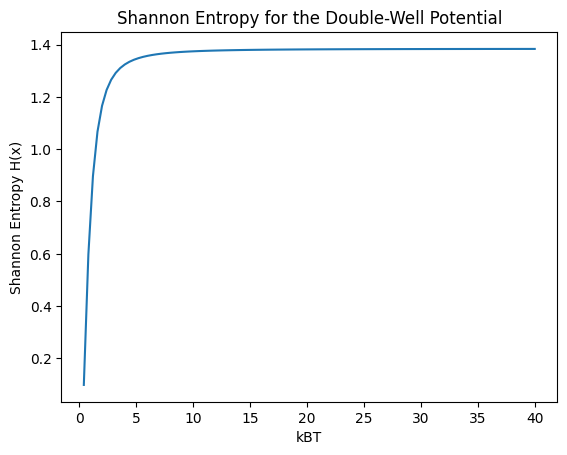

In [ ]:
################################################### Exercise 2, question e ####################################################################

# Define the function to calculate Shannon entropy analytically
def shannon_entropy_analytical(p, dx):
    return -simps(p * np.log(p), dx=dx)  # p is the probability distribution, dx is the spacing between points

# Define the double-well potential function
def double_well_potential(x, a, b):
    return -0.5 * a * x**2 + 0.25 * b * x**4

# Set the parameters
a = 4
b = 1
kBT_values = np.linspace(0.1 * (a**2) / (4 * b), 10 * (a**2) / (4 * b), 100)  # Range of kBT values
dx = 0.01  # Spacing between points for numerical integration
x_values = np.arange(-2, 2, dx)  # Range of x values

# Calculate and plot the Shannon entropy for each kBT value
entropies = []
for kBT in kBT_values:
    # Calculate the probability distribution using the Boltzmann distribution
    p = np.exp(-double_well_potential(x_values, a, b) / kBT)
    normalization = simps(p, dx=dx)  # Calculate the normalization constant using numerical integration
    p /= normalization  # Normalize the probability distribution
    # Calculate the entropy analytically and append to the list
    entropies.append(shannon_entropy_analytical(p, dx))

# Plot the results
plt.plot(kBT_values, entropies)
plt.xlabel('kBT')
plt.ylabel('Shannon Entropy H(x)')
plt.title('Shannon Entropy for the Double-Well Potential')
plt.show()


# Question 3

## Motion of active self-propelled microswimmers

* __item a:__ How does $\langle s(t) \rangle$ scale with time for $t$ small and $t$ large?

* __item b:__ Using Euler’s numerical simulation scheme, plot three stochastic trajectories of duration $5 \; s$, using a simulation time step $\Delta t = 1 \; ms$. Repeat the same procedure setting $\omega = 0$ and discuss the results that you obtain.

* __item c:__ Compare the theoretical prediction for $\langle ds(t) \rangle$ vs $t$ in the range $t \in [0, 5s]$ obtained in (a) with results from simulations (make at least 1000 simulations with time step $ \Delta t = 10 \; ms$ for each parameter choice).

In [ ]:
Dt=0.2
Dr=0.17
v=30
w=10
Delta_t=0.01

In [ ]:
def Epsilon():
  x=np.random.standard_normal()
  return x

In [ ]:
#t=np.linspace(1,10,10)

Theta_positions=[0]
X_positions=[0]
Y_positions=[0]
R_positions=[0]
i=0
while i < 500:
  theta=Theta_positions[i]+w*Delta_t+np.sqrt(2*Dr*Delta_t)*Epsilon()
  x=X_positions[i]+v*np.cos(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
  y=Y_positions[i]+v*np.sin(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
  r=(X_positions[i]*np.cos(Theta_positions[i])+Y_positions[i]*np.sin(Theta_positions[i])+Dt)/(np.sqrt(X_positions[i]*X_positions[i])+Y_positions[i]*Y_positions[i])*v
  Theta_positions.append(theta)
  X_positions.append(x)
  Y_positions.append(y)
  R_positions.append(r)
  i+=1


<ipython-input-4-ca0ca449e48f>:12: RuntimeWarning: divide by zero encountered in double_scalars
  r=(X_positions[i]*np.cos(Theta_positions[i])+Y_positions[i]*np.sin(Theta_positions[i])+Dt)/(np.sqrt(X_positions[i]*X_positions[i])+Y_positions[i]*Y_positions[i])*v


**Item a** For s(t) small and big

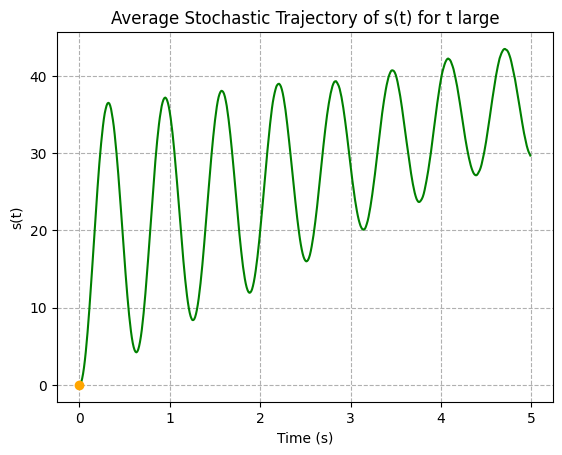

In [ ]:
#S=x^2 + y^2 average Dt=0.2, t small
Dt = 0.2
Dr = 0.17
v = 30
w = 10
Delta_t = 0.01

def Epsilon():
    return np.random.standard_normal()

# store all the 1000 trajectories
all_trajectories = []

# Generate the trajectories
for _ in range(1000):
    Theta_positions = [0]
    X_positions = [0]
    Y_positions = [0]
    S_positions = [0]
    i = 0
    time = np.arange(0, 500 * Delta_t, Delta_t)

    while i < 500:
        theta = Theta_positions[i] + w * Delta_t + np.sqrt(2 * Dr * Delta_t) * Epsilon()
        x = X_positions[i] + v * np.cos(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
        y = Y_positions[i] + v * np.sin(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
        s = (X_positions[i] * X_positions[i] + Y_positions[i] * Y_positions[i])

        Theta_positions.append(theta)
        X_positions.append(x)
        Y_positions.append(y)
        S_positions.append(s)
        i += 1

    all_trajectories.append(S_positions[1:])  # .Avoid the first element that is zero

# Compute the average
average_trajectory = np.mean(all_trajectories, axis=0)

# Graph the average trajectory
plt.plot(time, average_trajectory, label='Average S(t)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('s(t)')
plt.title('Average Stochastic Trajectory of s(t) for t large')
#plt.legend()
plt.grid(linestyle='dashed')
plt.plot(0,0,'o', color='orange')
plt.show()

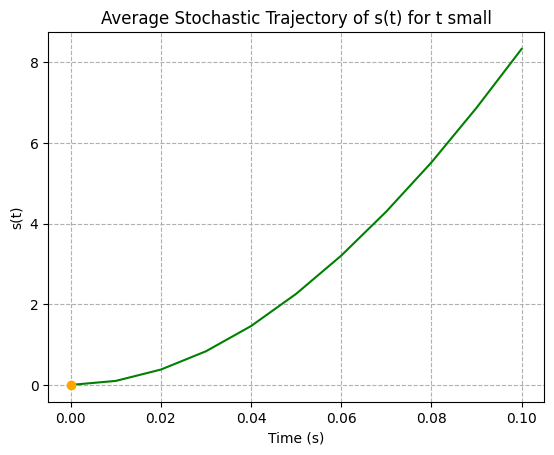

In [ ]:
#S=x^2 + y^2 average Dt=0.2, t small
Dt = 0.2
Dr = 0.17
v = 30
w = 10
Delta_t = 0.01

def Epsilon():
    return np.random.standard_normal()

# store all the 1000 trajectories
all_trajectories = []

# Generate the trajectories
for _ in range(1000):
    Theta_positions = [0]
    X_positions = [0]
    Y_positions = [0]
    S_positions = [0]
    i = 0
    time = np.arange(0, 11 * Delta_t, Delta_t)

    while i < 11:
        theta = Theta_positions[i] + w * Delta_t + np.sqrt(2 * Dr * Delta_t) * Epsilon()
        x = X_positions[i] + v * np.cos(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
        y = Y_positions[i] + v * np.sin(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
        s = (X_positions[i] * X_positions[i] + Y_positions[i] * Y_positions[i])

        Theta_positions.append(theta)
        X_positions.append(x)
        Y_positions.append(y)
        S_positions.append(s)
        i += 1

    all_trajectories.append(S_positions[1:])  # .Avoid the first element that is zero

# Compute the average
average_trajectory = np.mean(all_trajectories, axis=0)

# Graph the average trajectory
plt.plot(time, average_trajectory, label='Average S(t)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('s(t)')
plt.title('Average Stochastic Trajectory of s(t) for t small')
#plt.legend()
plt.grid(linestyle='dashed')
plt.plot(0,0,'o', color='orange')
plt.show()

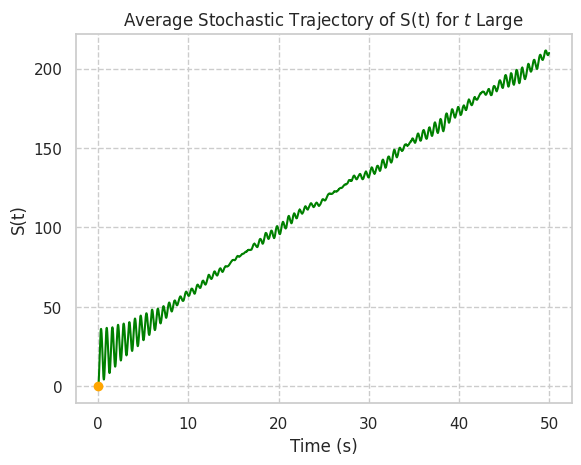

In [ ]:
#S=x^2 + y^2 average Dt=0.2, tlarge

import numpy as np
import matplotlib.pyplot as plt

Dt = 0.2
Dr = 0.17
v = 30
w = 10
Delta_t = 0.01

def Epsilon():
    return np.random.standard_normal()

# store all the 1000 trajectories
all_trajectories = []

# Generate the trajectories
for _ in range(1000):
    Theta_positions = [0]
    X_positions = [0]
    Y_positions = [0]
    S_positions = [0]
    i = 0
    time = np.arange(0, 5000 * Delta_t, Delta_t)

    while i < 5000:
        theta = Theta_positions[i] + w * Delta_t + np.sqrt(2 * Dr * Delta_t) * Epsilon()
        x = X_positions[i] + v * np.cos(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
        y = Y_positions[i] + v * np.sin(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
        s = (X_positions[i] * X_positions[i] + Y_positions[i] * Y_positions[i])

        Theta_positions.append(theta)
        X_positions.append(x)
        Y_positions.append(y)
        S_positions.append(s)
        i += 1

    all_trajectories.append(S_positions[1:])  # .Avoid the first element that is zero

# Compute the average
average_trajectory = np.mean(all_trajectories, axis=0)

# Graph the average trajectory
plt.plot(time, average_trajectory, label='Average S(t)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('S(t)')
plt.title('Average Stochastic Trajectory of S(t) for $t$ Large')
#plt.legend()
plt.grid(linestyle='dashed')
plt.plot(0,0,'o', color='orange')
plt.show()

**Item b)**
Stochastic trajectories

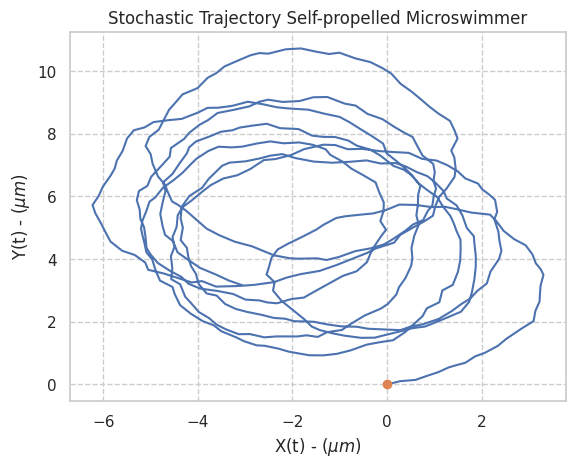

In [ ]:
plt.plot(X_positions,Y_positions)
plt.plot(0,0,'o')
plt.title('Stochastic Trajectory Self-propelled Microswimmer')
plt.xlabel("X(t) - ($\mu m$)")
plt.ylabel("Y(t) - ($\mu m$)")
plt.grid(linestyle='dashed')
#plt.legend()
plt.show()

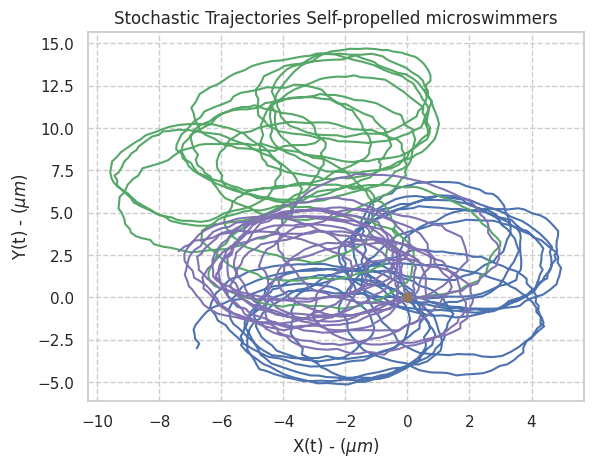

In [ ]:
t=np.linspace(1,3,3)
for j in t:
  Theta_positions=[0]
  X_positions=[0]
  Y_positions=[0]
  i=0
  while i < 1000:
    theta=Theta_positions[i]+w*Delta_t+np.sqrt(2*Dr*Delta_t)*Epsilon()
    x=X_positions[i]+v*np.cos(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    y=Y_positions[i]+v*np.sin(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    Theta_positions.append(theta)
    X_positions.append(x)
    Y_positions.append(y)
    i+=1
  plt.plot(X_positions,Y_positions)
  plt.plot(0,0,'o')
  plt.title('Stochastic Trajectories Self-propelled microswimmers')
  plt.xlabel("X(t) - ($\mu m$)")
  plt.ylabel("Y(t) - ($\mu m$)")
  plt.grid(linestyle='dashed')


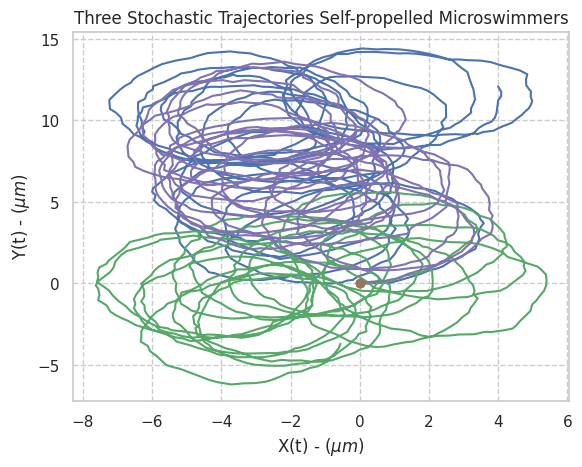

In [ ]:
t=np.linspace(1,3,3)
for j in t:
  Theta_positions=[0]
  X_positions=[0]
  Y_positions=[0]
  i=0
  while i < 1000:
    theta=Theta_positions[i]+w*Delta_t+np.sqrt(2*Dr*Delta_t)*Epsilon()
    x=X_positions[i]+v*np.cos(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    y=Y_positions[i]+v*np.sin(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    Theta_positions.append(theta)
    X_positions.append(x)
    Y_positions.append(y)
    i+=1
  plt.plot(X_positions,Y_positions)
  plt.plot(0,0,'o')
  plt.title('Three Stochastic Trajectories Self-propelled Microswimmers')
  plt.xlabel("X(t) - ($\mu m$)")
  plt.ylabel("Y(t) - ($\mu m$)")
  plt.grid(linestyle='dashed')

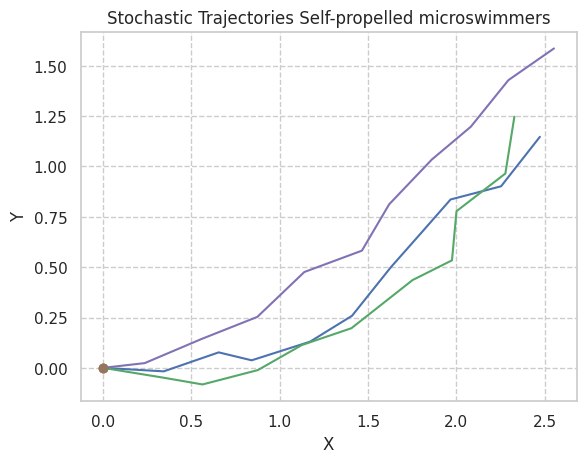

In [ ]:
t=np.linspace(1,3,3)
for j in t:
  Theta_positions=[0]
  X_positions=[0]
  Y_positions=[0]
  i=0
  while i < 10:
    theta=Theta_positions[i]+w*Delta_t+np.sqrt(2*Dr*Delta_t)*Epsilon()
    x=X_positions[i]+v*np.cos(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    y=Y_positions[i]+v*np.sin(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    Theta_positions.append(theta)
    X_positions.append(x)
    Y_positions.append(y)
    i+=1
  plt.plot(X_positions,Y_positions)
  plt.plot(0,0,'o')
  plt.title('Stochastic Trajectories Self-propelled microswimmers')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.grid(linestyle='dashed')


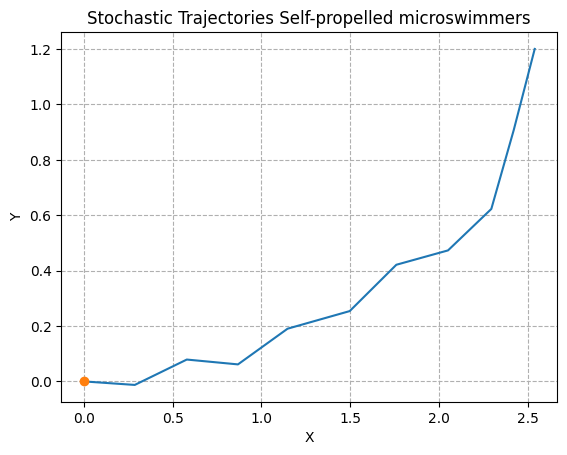

In [ ]:
t=np.linspace(1,1,1)
for j in t:
  Theta_positions=[0]
  X_positions=[0]
  Y_positions=[0]
  i=0
  while i < 10:
    theta=Theta_positions[i]+w*Delta_t+np.sqrt(2*Dr*Delta_t)*Epsilon()
    x=X_positions[i]+v*np.cos(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    y=Y_positions[i]+v*np.sin(Theta_positions[i])*Delta_t+np.sqrt(2*Dt*Delta_t)*Epsilon()
    Theta_positions.append(theta)
    X_positions.append(x)
    Y_positions.append(y)
    i+=1
  plt.plot(X_positions,Y_positions)
  plt.plot(0,0,'o')
  plt.title('Stochastic Trajectories Self-propelled microswimmers')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.grid(linestyle='dashed')


**item c)**

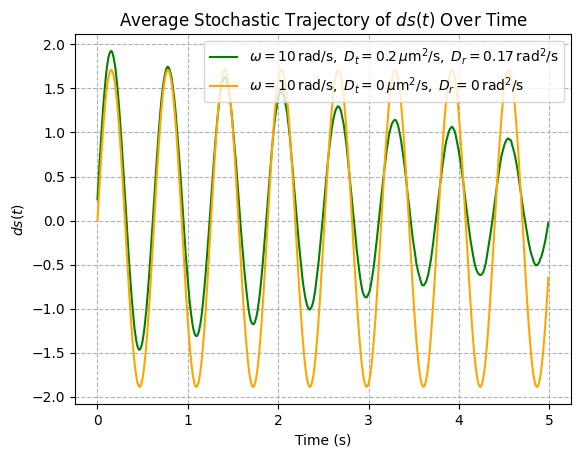

In [ ]:
def Epsilon():
    # Return a sample from the standard normal distribution
    return np.random.standard_normal()

def generate_trajectory(Dt, Dr, v, w, Delta_t):
    # Generate multiple trajectories and calculate the mean
    all_trajectories = []
    for _ in range(1000):
        # Initialize positions for theta, x, y, and ds
        Theta_positions = [0]
        X_positions = [0]
        Y_positions = [0]
        dS_positions = [0]
        i = 0
        time = np.arange(0, 500 * Delta_t, Delta_t)

        while i < 500:
            # Update theta, x, y, and ds positions
            theta = Theta_positions[i] + w * Delta_t + np.sqrt(2 * Dr * Delta_t) * Epsilon()
            x = X_positions[i] + v * np.cos(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
            y = Y_positions[i] + v * np.sin(Theta_positions[i]) * Delta_t + np.sqrt(2 * Dt * Delta_t) * Epsilon()
            ds = 2 * v * Delta_t * (X_positions[i] * np.cos(Theta_positions[i]) + Y_positions[i] * np.sin(Theta_positions[i]) + (2 * Dt))
            Theta_positions.append(theta)
            X_positions.append(x)
            Y_positions.append(y)
            dS_positions.append(ds)
            i += 1

        # Collect all ds positions except the first element (which is zero)
        all_trajectories.append(dS_positions[1:])

    # Calculate the mean trajectory
    return np.mean(all_trajectories, axis=0), time

# Common parameters
Dr = 0.17
v = 30
w = 10
Delta_t = 0.01

# Generate trajectory with Dt = 0.2
average_trajectory_Dt_02, time = generate_trajectory(0.2, Dr, v, w, Delta_t)

# Generate trajectory with Dt = 0
average_trajectory_Dt_0, _ = generate_trajectory(0, 0, v, w, Delta_t)

# Plot the average trajectories
plt.plot(time, average_trajectory_Dt_02, label=r'$\omega=10\,\mathrm{rad/s},\;D_t=0.2\,\mu\mathrm{m}^2/\mathrm{s},\;D_r=0.17\,\mathrm{rad}^2/\mathrm{s}$', color='green')
plt.plot(time, average_trajectory_Dt_0, label=r'$\omega=10\,\mathrm{rad/s},\;D_t=0\,\mu\mathrm{m}^2/\mathrm{s},\;D_r=0\,\mathrm{rad}^2/\mathrm{s}$', color='orange')

plt.xlabel('Time (s)')
plt.ylabel('$ds(t)$')
plt.title('Average Stochastic Trajectory of $ds(t)$ Over Time')
plt.legend()
plt.grid(linestyle='dashed')
plt.show()


# Question 4
## Continuous-time Markov-jump model of an enzymatic reaction

* **item b:** Calculate the probability to be in any of the state in the long time limit, i.e. its stationary value. Compare this result with the associated Boltzmann distribution

* __item d:__ Suppose now that the enzyme consumes one ATP molecule every time that an "upwards" transition with rate $r$ takes place. Make 5 stochastic simulations of the total number of ATP
molecules consumed as a function of time for the parameter values $\gamma = r = 0.5 \; s^{−1}$ and $E = 2 \; k_BT$.
Compute from 1000 simulations what is the average number of ATP molecules consumed in 5 min, and relate this value to the net stationary current of the model.


**item b and item c**

In [ ]:
# Parameters setting
gamma=0.5
r=0.5
T=300
beta=1/(Boltzmann*T)
E=2*Boltzmann*T

#Teting
States=[1,2,3,4]
#Random Initial Condition
current_state=np.random.choice(States)
Transition_rates=[r+(gamma*np.exp(-beta*E)),gamma+r,gamma+r,r+(gamma*np.exp(-beta*E))]
scape_rate=Transition_rates[current_state-1]
scape_rate=Transition_rates[current_state-1]
tau=np.random.exponential(scape_rate)
#print(tau)
print(r+gamma, r+(gamma*np.exp(-beta*E)))

1.0 0.5676676416183064


In [ ]:
#States
States=[1,2,3,4]

#Jump to state B given that I am in A with probability WBA
W12=(gamma)/(gamma+r)
W21=(gamma*np.exp(-beta*E))/(r+gamma*np.exp(-beta*E))
W13=(r)/(gamma+r)
W31=(r)/(r+gamma*np.exp(-beta*E))
W24=(r)/(r+gamma*np.exp(-beta*E))
W42=(r)/(gamma+r)
W34=(gamma*np.exp(-beta*E))/(r+gamma*np.exp(-beta*E))
W43=(gamma)/(gamma+r)

#Array with the transition rate probabilities for each state
#Is it necessary the minus sign? No because I only be interest in the number como tal
Transition_rates=[r+(gamma*np.exp(-beta*E)),gamma+r,gamma+r,r+(gamma*np.exp(-beta*E))]
#NormalizationTest
#print(W21+W31,W12+W42,W43+W13,W24+W34)

In [ ]:
#When to Jump!
def Tau(current_state):
  scape_rate=Transition_rates[current_state-1]
  tau=np.random.exponential(scape_rate)
  #Because only two values 0.56, o 1
  if tau < 1:
    tau=1
  else:
    tau=tau
  return tau

print(scape_rate)

1.0


In [ ]:
#Algorithm
def Gillespie(total_time):
  current_state=np.random.choice(States) #initial state Random
  Trajectory=[current_state] #Stores all the trajectory
  update=np.random.uniform() #uniformily distributed random number
  t=0
  ATP=[]
  while t <= total_time:
    tau=Tau(current_state)
    Trajectory.extend(current_state for _ in range(int(tau))) #appends tau times the current state
    t+=tau #total time elapsed
    ATP.extend(0 for _ in range(int(tau)))
    #for the state 1
    if current_state == 1:
      # How long the system will stay in state 1
      tau=Tau(current_state)
      Trajectory.extend(current_state for _ in range(int(tau)))
      t+=tau
      #Upgrades to the new state based on the interval to whom the random value belongs
      if update < W21:
        current_state=2
        update=np.random.uniform()
        ATP.extend(0 for _ in range(int(tau)))
      else:
        current_state=3
        update=np.random.uniform()
        ATP.extend(1 for _ in range(int(tau)))

    #for the state 2
    if current_state == 2:
      # How long the system will stay in state 2
      tau=Tau(current_state)
      Trajectory.extend(current_state for _ in range(int(tau)))
      t+=tau
      if update < W12:
        current_state=1
        update=np.random.uniform()
        ATP.extend(0 for _ in range(int(tau)))
      else:
        current_state=4
        update=np.random.uniform()
        ATP.extend(0 for _ in range(int(tau)))

    #for the state 3
    if current_state == 3:
      # How long the system will stay in state 3
      tau=Tau(current_state)
      Trajectory.extend(current_state for _ in range(int(tau)))
      t+=tau
      if update < W43:
        current_state=4
        update=np.random.uniform()
        ATP.extend(0 for _ in range(int(tau)))
      else:
        current_state=1
        update=np.random.uniform()
        ATP.extend(0 for _ in range(int(tau)))

    #for the state 4
    if current_state == 4:
      # How long the system will stay in state 4
      tau=Tau(current_state)
      Trajectory.extend(current_state for _ in range(int(tau)))
      t+=tau
      if update < W24:
        current_state=2
        update=np.random.uniform()
        ATP.extend(1 for _ in range(int(tau)))
      else:
        current_state=3
        update=np.random.uniform()
        ATP.extend(0 for _ in range(int(tau)))

  return Trajectory, ATP

In [ ]:
W = [W12,W21,W13,W31,W24,W42,W34,W43]
print(Gillespie(10))
#plt.hist(Gillespie(5*60))

([2, 2, 2, 2, 4, 2, 2, 1, 1, 3, 4], [0, 0, 0, 1, 0, 0, 0, 1, 0, 1])


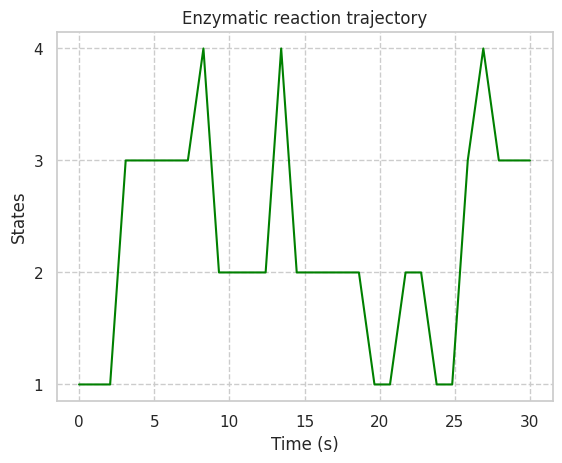

In [ ]:
#Plot (0-30 seconds)
time=30
Trajectory, ATP=Gillespie(time)
plt.plot(np.linspace(0,time,len(Trajectory)),Trajectory, color='green')
plt.yticks(np.arange(1, 5, 1))
plt.title('Enzymatic reaction trajectory')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.grid(linestyle='dashed')
plt.savefig("EnzymaticReationTrajectory_30s.pdf")

[2, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 4, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 3, 4, 2, 2, 4, 2, 2, 1, 1, 1, 3, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 1, 1, 3, 3, 1, 1, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 3, 4, 2, 2, 4, 2, 2, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 2, 4, 3, 3, 4, 3, 3, 1, 1, 3, 4, 2, 2, 2, 2, 1, 1, 3, 4, 2, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 3, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 3, 3, 1, 1, 3, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 3, 3, 1, 1, 3, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 2, 4, 2, 2, 4, 2, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 4, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 4]


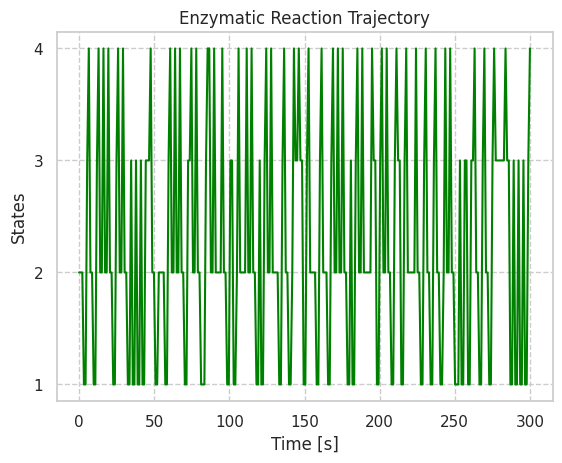

In [ ]:
#Plot (0-300 seconds)
time=5*60
Trajectory, ATP=Gillespie(time)
plt.plot(np.linspace(0,time,len(Trajectory)),Trajectory, color='green')
plt.yticks(np.arange(1, 5, 1))
plt.title('Enzymatic Reaction Trajectory')
plt.xlabel('Time [s]')
plt.ylabel('States')
plt.grid(linestyle='dashed')
plt.savefig("EnzymaticReactionTrajectory_5minutes.png")
print(Trajectory)

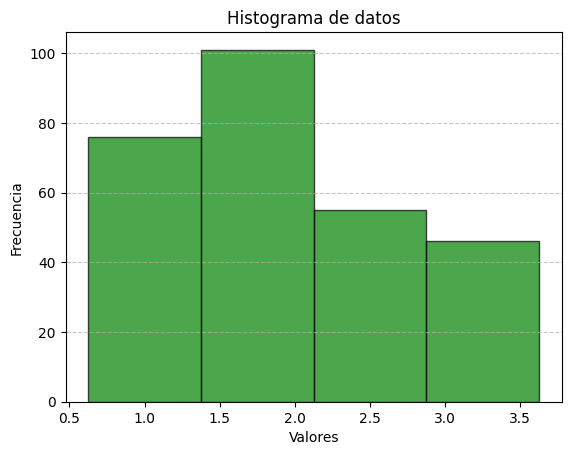

In [ ]:
#Attempt to  associated Boltzmann distribution

data = [2, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 4, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 3, 4, 2, 2, 4, 2, 2, 1, 1, 1, 3, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 1, 1, 3, 3, 1, 1, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 3, 4, 2, 2, 4, 2, 2, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 2, 4, 3, 3, 4, 3, 3, 1, 1, 3, 4, 2, 2, 2, 2, 1, 1, 3, 4, 2, 2, 2, 1, 1, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2, 1, 1, 3, 1, 1, 3, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 3, 3, 1, 1, 3, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 3, 3, 1, 1, 3, 4, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 2, 4, 2, 2, 4, 2, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 4, 2, 2, 1, 1, 3, 4, 2, 2, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 4]

plt.hist(data, bins=max(data)-min(data)+1, align='left', edgecolor='black', alpha=0.7, color='green')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title('Trajectories histogram')
plt.show()

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import maxwell

# # Tus datos
# data = [2, 2, 2, 1, 1, 3, 4, ...]  # Continúa con tus datos

# # Histograma de tus datos
# plt.hist(data, bins=max(data) - min(data) + 1, align='left', edgecolor='black', alpha=0.7, color='green')

# # Parámetros para la distribución de Maxwell (estos son solo ejemplos y deben ser ajustados)
# T = 300  # Temperatura en Kelvin
# masa = 28.97 * 1.66e-27  # Masa del gas (por ejemplo, N2 en kg)
# k_B = 1.38e-23  # Constante de Boltzmann en J/K
# vth = np.sqrt(2 * k_B * T / masa)  # Calcular la velocidad térmica

# # Escalamos la distribución de Maxwell para que coincida con el rango de tus datos
# escala = 4 / vth  # Ajusta este valor según sea necesario
# velocidades = np.linspace(0, 4, 100)  # Ajusta este rango según sea necesario
# pdf = maxwell.pdf(velocidades, scale=escala)

# # Superponer la distribución de Maxwell
# plt.plot(velocidades, pdf * len(data) * (max(data) - min(data) + 1), label='Distribución de Maxwell')

# # Configurar el gráfico
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xlabel('Valores')
# plt.ylabel('Frecuencia')
# plt.title('Histograma de datos con Distribución de Maxwell')
# plt.legend()

# # Mostrar el gráfico
# plt.show()

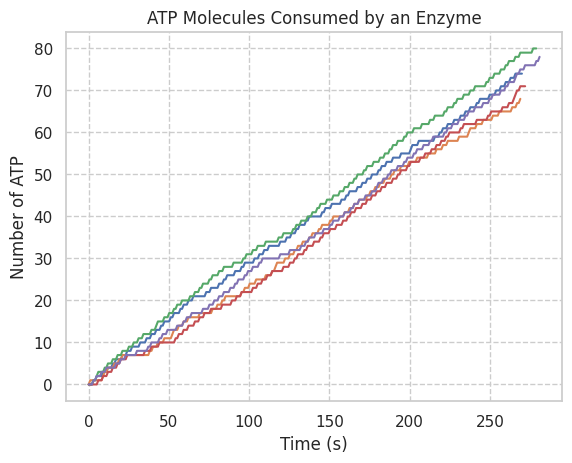

In [ ]:
i=0
time=5*60
while i < 5:
  Trajectory, ATP=Gillespie(time)
  plt.plot(np.linspace(0,len(np.cumsum(ATP)),len(np.cumsum(ATP))),np.cumsum(ATP))
  plt.grid(linestyle='dashed')
  plt.title('ATP Molecules Consumed by an Enzyme')
  plt.xlabel('Time (s)')
  plt.ylabel('Number of ATP')
  i+=1
  plt.savefig("EnzymaticReactionTrajectory_5minutes.pdf")

In [ ]:
#Average number of ATP molecules consumed in 5min
i=0
time=5*60
totalATP=[]
while i < 1000:
  Trajectory, ATP=Gillespie(time)
  totalATP.append(np.sum(ATP))
  i+=1
np.mean(totalATP)

74.381